In [122]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import sklearn
from sklearn.model_selection import train_test_split
from rich.progress import Progress
import random
from tensorflow import keras
import seaborn as sns

In [123]:
Raw_dir = '../data/raw'
Processed_dir = '../data/processed'
Figure_path = '../outputs'
Img_Size = (28,28)
data_classes = np.array(['0','1','2','3','4','5','6','7','8','9'])

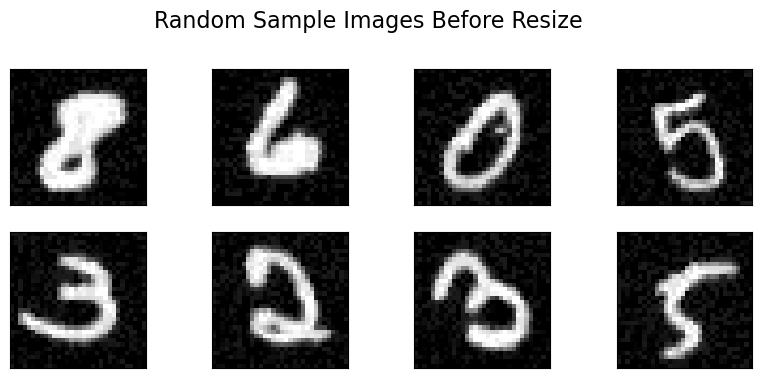

In [132]:
def show_raw_images(directory):
    All_images = []

    for digit in range(10):
        digit_folder = os.path.join(directory, str(digit))
        if os.path.exists(digit_folder):
            for img_file in os.listdir(digit_folder):
                All_images.append(os.path.join(digit_folder, img_file))
    
    if len(All_images) == 0:
        print("No images found in the directory!")
        return

    num_samples = min(8, len(All_images))
    random_images = random.sample(All_images, num_samples)
    
    plt.figure(figsize=(10,6))
    
    for i, img_path in enumerate(random_images):
        img = cv2.imread(img_path)               
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(3,4,i+1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

    plt.suptitle("Random Sample Images Before Resize", fontsize=16)
    plt.show()

directory = os.path.join(Raw_dir,'mnist')
show_raw_images(directory)

In [114]:
input_path = os.path.join(Raw_dir, 'mnist')
output_path = os.path.join(Raw_dir, 'resized')

os.makedirs(output_path, exist_ok=True)

with Progress() as progress:
    task = progress.add_task("Processing...", total=len(os.listdir(input_path)))

    for label in os.listdir(input_path):

        label_input_dir = os.path.join(input_path, label)
        label_output_dir = os.path.join(output_path, label)

        os.makedirs(label_output_dir, exist_ok=True)

        for imagefile in os.listdir(label_input_dir):

            imagepath = os.path.join(label_input_dir, imagefile)
            img = cv2.imread(imagepath)

            if img is None:
                print("Skipping invalid image:", imagepath)
                continue

            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            img_resized = cv2.resize(img_gray, Img_Size)

            # img_normalized = img_resized/255.0

            name,ext = os.path.splitext(imagefile)
        
            final_image_path = f'{name}_resized{ext}'

            save_path = os.path.join(label_output_dir, final_image_path)
        
            cv2.imwrite(save_path, img_resized)

        progress.update(task, advance=1)

c:\ProgramData\anaconda3\envs\ML\lib\site-packages\rich\live.py:256: UserWarning: install "ipywidgets" for Jupyter 
support
  warnings.warn('install "ipywidgets" for Jupyter support')

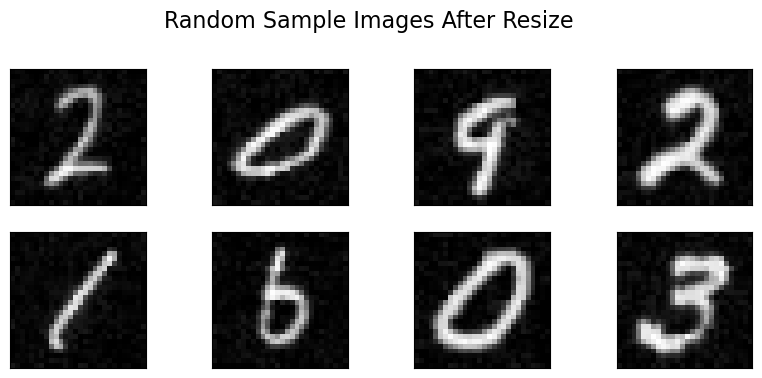

In [133]:
def show_raw_images(directory):
    All_images = []

    for digit in range(10):
        digit_folder = os.path.join(directory, str(digit))
        if os.path.exists(digit_folder):
            for img_file in os.listdir(digit_folder):
                All_images.append(os.path.join(digit_folder, img_file))
    
    if len(All_images) == 0:
        print("No images found in the directory!")
        return

    num_samples = min(8, len(All_images))
    random_images = random.sample(All_images, num_samples)
    
    plt.figure(figsize=(10,6))
    
    for i, img_path in enumerate(random_images):
        img = cv2.imread(img_path)               
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(3,4,i+1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

    plt.suptitle("Random Sample Images After Resize", fontsize=16)
    plt.show()

directory = os.path.join(Raw_dir,'resized')
show_raw_images(directory)

In [115]:
for digit in range(10):
    digit_str = str(digit)

    digit_path_train = os.path.join(Processed_dir, 'train', digit_str)
    os.makedirs(digit_path_train, exist_ok=True)

    digit_path_test = os.path.join(Processed_dir, 'test', digit_str)
    os.makedirs(digit_path_test, exist_ok=True)

In [141]:
random.seed(42)

def data_split():
    train_ratio = 0.8

    for split in ['train', 'test']:
        for digit in range(10):
            folder = os.path.join(Processed_dir, split, str(digit))
            shutil.rmtree(folder, ignore_errors=True)
            os.makedirs(folder, exist_ok=True)

    for digit in range(10):
        digit_str = str(digit)
        digit_folder = os.path.join(output_path, digit_str)

        if not os.path.exists(digit_folder):
            print(f"Missing folder: {digit_folder}")
            continue

        images = os.listdir(digit_folder)

        random.shuffle(images)

        split_index = int(len(images) * train_ratio)
        train_images = images[:split_index]
        test_images = images[split_index:]

        for img in train_images:
            src = os.path.join(digit_folder, img)
            dst = os.path.join(Processed_dir, 'train', digit_str, img)
            shutil.copy(src, dst)

        for img in test_images:
            src = os.path.join(digit_folder, img)
            dst = os.path.join(Processed_dir, 'test', digit_str, img)
            shutil.copy(src, dst)

    print("Data Splitted successfully!")

data_split()  

Data Splitted successfully!


In [ ]:

# def split(input_dir, output_dir):
#     image_paths = []
#     labels = []

#     for digit in range(10):
#         digit_path = os.path.join(input_dir, str(digit))
#         for img in os.listdir(digit_path):
#             image_paths.append(os.path.join(digit_path, img))
#             labels.append(digit)

#     train_paths, test_paths, y_train, y_test = train_test_split(
#         image_paths, labels, test_size=0.2, random_state=42, stratify=labels
#     )

#     # Save images
#     for path, label in zip(train_paths, y_train):
#         save_dir = os.path.join(output_dir, "train", str(label))
#         os.makedirs(save_dir, exist_ok=True)
#         shutil.copy(path, save_dir)

#     for path, label in zip(test_paths, y_test):
#         save_dir = os.path.join(output_dir, "test", str(label))
#         os.makedirs(save_dir, exist_ok=True)
#         shutil.copy(path, save_dir)

#     print("Data splitted completed.")


In [142]:
def split_results(split_dir):
    results = []

    for digit in range(10):
        digit_folder = os.path.join(split_dir, str(digit))

        if not os.path.exists(digit_folder):
            count = 0
        else:
            count = len(os.listdir(digit_folder))

        results.append(count)

        print(f'Digit {digit} → {count} Images')

        # images = os.listdir(digit_folder)
        # results[digit] = len(images)

    # return results


In [143]:
print('Train Data Results for each Classes:')
split_results(os.path.join(Processed_dir,'train'))
print('\nTest Data Results for each Classes:')
split_results(os.path.join(Processed_dir,'test'))

Train Data Results for each Classes:
Digit 0 → 4738 Images
Digit 1 → 5393 Images
Digit 2 → 4766 Images
Digit 3 → 4904 Images
Digit 4 → 4673 Images
Digit 5 → 4336 Images
Digit 6 → 4734 Images
Digit 7 → 5012 Images
Digit 8 → 4680 Images
Digit 9 → 4759 Images

Test Data Results for each Classes:
Digit 0 → 1185 Images
Digit 1 → 1349 Images
Digit 2 → 1192 Images
Digit 3 → 1227 Images
Digit 4 → 1169 Images
Digit 5 → 1085 Images
Digit 6 → 1184 Images
Digit 7 → 1253 Images
Digit 8 → 1171 Images
Digit 9 → 1190 Images


Saved plot: ../outputs\split_distribution.png


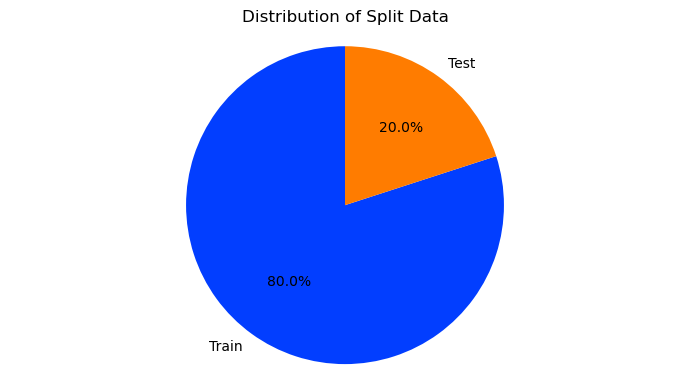

In [144]:
counts = {"train": 0, "test": 0}

for split in ["train", "test"]:
    total = 0
    for digit in range(10):
        digit_folder = os.path.join(Processed_dir, split, str(digit))

        if os.path.exists(digit_folder):
            total += len(os.listdir(digit_folder))

    counts[split] = total

labels = ["Train", "Test"]
total_count = [counts["train"], counts["test"]]

colors = sns.color_palette("bright")

plt.figure(figsize=(7, 4))
plt.pie(total_count, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Distribution of Split Data")
plt.axis('equal')
plt.tight_layout()

save_path = os.path.join(Figure_path, "split_distribution.png")
plt.savefig(save_path)
print(f"Saved plot: {save_path}")

plt.show()

Saved plot: ../outputs\train_distribution.png


C:\Users\moham\AppData\Local\Temp\ipykernel_23632\1669316237.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


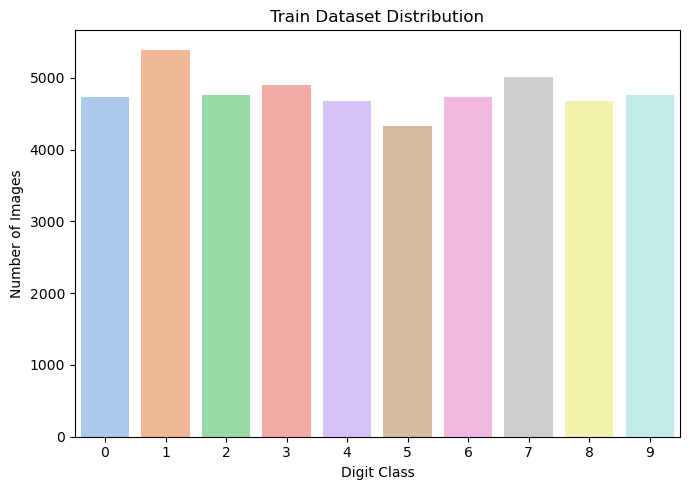

C:\Users\moham\AppData\Local\Temp\ipykernel_23632\1669316237.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Saved plot: ../outputs\test_distribution.png


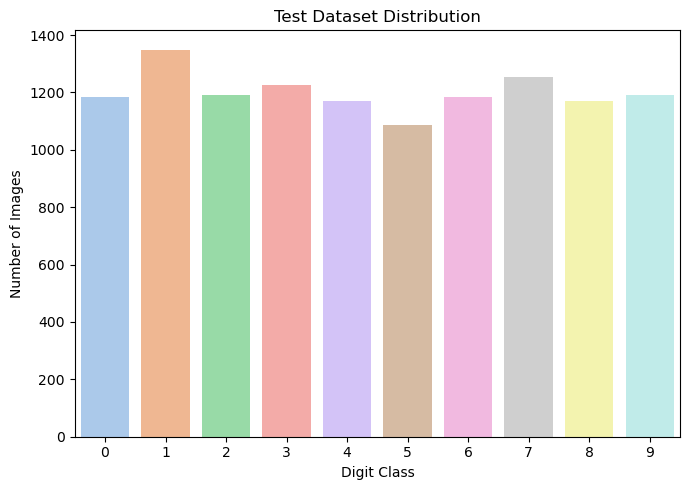

In [145]:
for split in ['train','test']:

    counts = {str(i): 0 for i in range(10)}   # reset for each split

    for digit in range(10):
        digit_folder = os.path.join(Processed_dir, split, str(digit))

        if os.path.exists(digit_folder):
            counts[str(digit)] = len(os.listdir(digit_folder))
        else:
            counts[str(digit)] = 0

    plt.figure(figsize=(7,5))
    sns.barplot(
        x=data_classes,
        y=[counts[d] for d in data_classes],
        palette="pastel"
    )

    plt.title(f'{split.capitalize()} Dataset Distribution')
    plt.xlabel("Digit Class")
    plt.ylabel("Number of Images")
    plt.tight_layout()

    save_path = os.path.join(Figure_path, f"{split}_distribution.png")
    plt.savefig(save_path)
    print(f"Saved plot: {save_path}")
    plt.show()